# Image Transformations Lab
All  of  the  programming  assignments  are  to  be  done  in  Python  using  additional  libraries  specified  in  the  assignments.  There  are many  libraries  available,  some  of  which  we  will  be  using,  and  you  are  welcome  to  use  them  with  one  exception:  if  the  library  or  a  function  within  it  performs  the  specific  function  you  are  asked  to  code,  you  may  not  use  that  other  than  perhaps  as  a  reference  to  compare  against. All  of  the  code  you  submit  must  be  your  own. You are welcome to turn in a completed jupyter notebook.

**Note:** In most math classes, the direction of the positve Y-axis is up. In this lab (and most image packages), the direction of the positive Y-axis is down. This means that you will need to rotate in the opposite direction of what you might intuitively think.

**Note:** For this lab you will need a package called Python Image Libary or PIL. You may need to install it into your python environment with `conda install pillow` or `pip install pillow`.

#### Preliminary Code

In [189]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Set the default figure size for all plots
plt.rcParams['figure.figsize'] = [10, 8]

# def compose(frame, image, transformation):
    
#     width, height = frame.size
    
#     #Invert matrix for compose function, grab values for Affine Transform
#     t = np.linalg.inv(transformation)
#     a=t[0,0]; b=t[0,1]; c=t[0,2]; d=t[1,0]; e=t[1,1]; f=t[1,2]
    
#     image = image.transform((width,height), Image.AFFINE,(a,b,c,d,e,f), Image.BICUBIC)

#     #Make mask from image's location
#     im = np.sum(np.asarray(image), -1)
#     vals = 255.0*( im > 0)
#     mask = Image.fromarray(vals).convert("1")

#     #Composite images together
#     result = Image.composite(image,frame,mask)

#     return result

#### Your Defined Transformations

For this lab you will take a set of 12 images that are given to you, then perform the appropriate translations, rotations, and scales to place those images in the locations specified in the output collage. You will need to provide the appropriate transformation matrices to place the other 11. The transformation matrices should assume homogenous coordinates. One of the 12 images has been done for you in the code below.

Tip: Make sure you are comfortable with building your own transformations and how the compositing code works, then try implementing your own function that generates transformation matrices based on scale, roation, and translation values.

`Bird Class`
---

**The `Bird` class is initialized with the `PIL` image.**  
**Later the `Bird` object is assigned it's transformation matrix**

In [190]:
class Bird:
    def __init__(self, im):
        self.image = im
        self.m = None

    def build_affine(self, t, scale = 1.0, degree = None, radian = None):

        # grab all transformation values now because FOMO... and I'll probably need them later
        self.t = t
        self.scale = scale
        self.degree = degree
        self.radian = radian

        # default 'scale' is 1
        # branchless pathing where final matrix is unchanged (scaled by 1), or modified by a scalar
        S = np.array([[scale, 0, 0],
                      [0, scale, 0],
                      [0, 0, 1]])
        
        T = np.array([[1, 0, t[0]],
                      [0, 1, t[1]],
                      [0, 0, 1]], dtype = np.float32)
    
        if degree or radian: 
            theta = -radian if radian else -np.radians(degree) # dynamically handles rads or degs
        
            R = np.array([[np.cos(theta), -np.sin(theta), 0],
                          [np.sin(theta), np.cos(theta), 0],
                          [0, 0, 1]], dtype = np.float32)
            self.m = T @ R @ S
        else: # if no degree or radian, then there's no rotation that needs to be applied
            self.m = T @ S

`Load All Images`
---

**`glob` all files at once.**  
**Sort files by filename number.**  
**Sync filename number with list indices.**

In [191]:
import glob as g
import re

# load background
frame = Image.open("PictureFrameCollage.png").convert("RGB")

# get all "Bird" files
images = g.glob('Bird*.png')

# sort the files numerically
images = sorted(images, key = lambda x: int(re.search(r'\d+', x).group())) # a lil dash of regex for some easy string manipulation
birds = []

# birds[] and Bird*.png now have identical indeces
for image in images:
    bird = Bird(im = Image.open(image).convert("RGB"))
    birds.append(bird)


`Modified Compose Function`
---

**The modified `compose()` composites *ALL* of the bird images onto the `frame` in one go.**

In [192]:
def compose(frame, birds):
    
    width, height = frame.size
    result = frame.copy() # compiler gets mad if "result" isn't init before pasting
    
    for bird in birds:
        #Invert matrix for compose function, grab values for Affine Transform
        t = np.linalg.inv(bird.m)
        a, b, c = t[0,0], t[0,1], t[0,2]
        d, e, f = t[1,0], t[1,1], t[1,2]
        
        image = bird.image.transform(
            (width,height), 
            Image.AFFINE,
            (a, b, c, d, e, f),
            Image.BICUBIC
        )

        #Make mask from image's location
        image_array = np.array(image)
        mask_values = 255.0*(np.sum(image_array, axis = -1) > 0)
        mask = Image.fromarray(mask_values).convert('1')

        # composite ALL birdies
        result.paste(image, (0, 0), mask)
    return result

`Initialize all Birds`
---

In [193]:
birds[0].build_affine(t = (619, 434))
birds[1].build_affine(t = (41, 30), scale = 1.22)
birds[2].build_affine(t = (283, 46), scale = .389)
birds[3].build_affine(t = (419, 87), degree = 30)
birds[4].build_affine(t = (673, 37), scale = .653, degree = -15)
birds[5].build_affine(t = (350, 138), degree = -45)
birds[6].build_affine(t = (385, 379), degree = 45)
birds[7].build_affine(t = (514, 225), scale = .389)
birds[8].build_affine(t = (633, 228), scale = .736, degree = 15)
birds[9].build_affine(t = (305, 358), scale = .389, degree = -45)
birds[10].build_affine(t = (46, 354), scale = 1.21, degree = 15)
birds[11].build_affine(t = (308, 463), scale = .736)

`Final Composited Image`
---

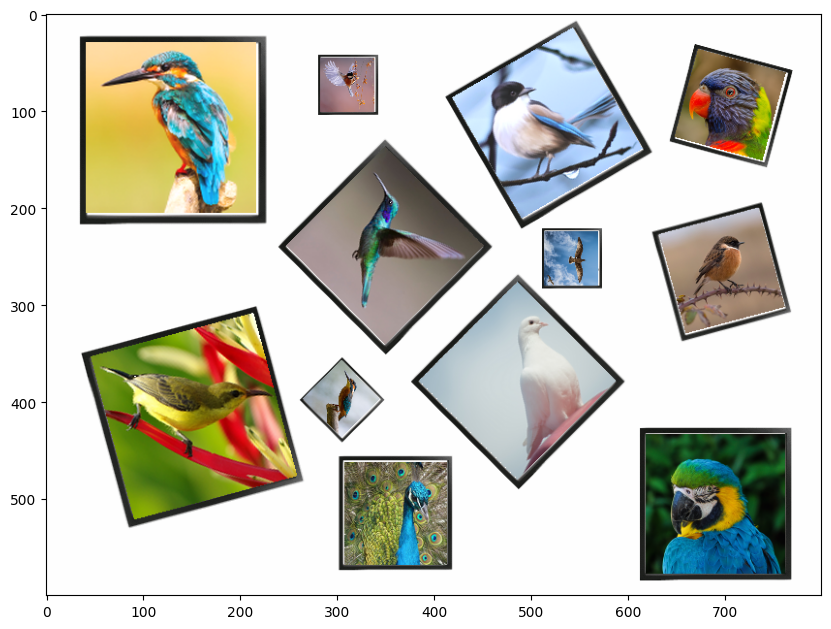

In [194]:
result = compose(frame, birds)
plt.imshow(result)
plt.show()